### 수치적분: 사다리꼴 방법과 심슨 방법

수치적분은 주어진 함수의 적분값을 근사적으로 계산하는 방법입니다. 여기서는 **사다리꼴 방법**과 **심슨 방법**을 파이썬으로 구현하는 방법을 설명하고, 각 방법에 대한 코드를 제공합니다.

---

### 1. **사다리꼴 방법 (Trapezoidal Rule)**

사다리꼴 방법은 주어진 구간을 여러 작은 구간으로 나누고, 각 구간에서 함수를 직선으로 근사하여 넓이를 계산하는 방법입니다. 작은 구간에서 사다리꼴 모양으로 넓이를 계산하므로, 사다리꼴 방법이라고 불립니다.

#### 사다리꼴 방법의 공식:
$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$
여기서:
- $ h = \frac{b - a}{n} $
- $ x_i = a + ih $ 는 각 구간의 중간점입니다.


---

### 2. **심슨 방법 (Simpson's Rule)**

**심슨 방법**은 사다리꼴 방법보다 정확한 수치적분 방법으로, 함수의 구간을 이차 다항식으로 근사하여 적분값을 계산합니다. **2차 곡선**을 사용하므로 더 높은 정확도를 제공합니다.

#### 심슨 방법의 공식 (n이 짝수일 때):
$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4 \sum_{i \text{ 짝수}} f(x_i) + 2 \sum_{i \text{ 홀수}} f(x_i) + f(b) \right]
$$
여기서:
- $ h = \frac{b - a}{n} $
- $ x_i = a + ih $ 는 각 구간의 점입니다.


사다리꼴 방법으로 계산한 적분값: 1.9998355038874436
심슨 방법으로 계산한 적분값: 2.000000010824504


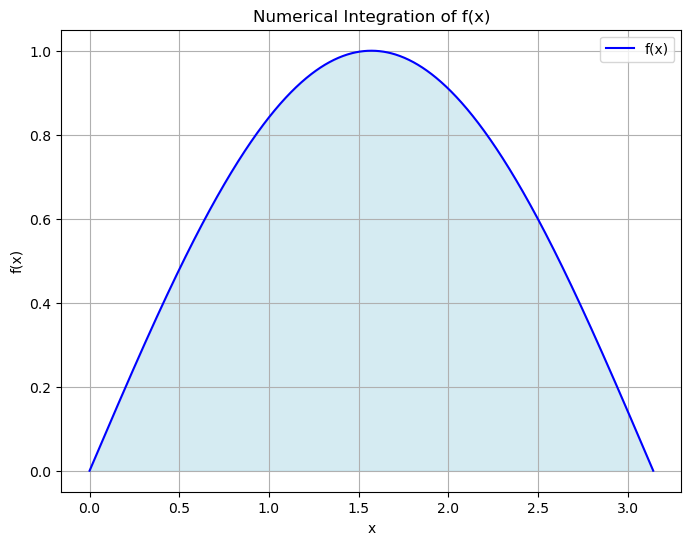

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 사다리꼴 방법과 심슨 방법을 포함한 수치적분 클래스
class NumericalIntegration:
    def __init__(self, f, a, b, n):
        """
        NumericalIntegration 클래스 초기화
        :param f: 적분할 함수
        :param a: 적분 구간 시작점
        :param b: 적분 구간 끝점
        :param n: 분할할 구간의 수 (심슨 방법에서는 짝수여야 함)
        """
        self.f = f  # 적분할 함수
        self.a = a  # 적분 구간 시작
        self.b = b  # 적분 구간 끝
        self.n = n  # 구간 수

    def trapezoidal_rule(self):
        """
        사다리꼴 방법으로 적분 수행
        """
        h = (self.b - self.a) / self.n
        x = np.linspace(self.a, self.b, self.n + 1)
        y = self.f(x)
        integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
        return integral

    def simpsons_rule(self):
        """
        심슨 방법으로 적분 수행 (n은 짝수여야 함)
        """
        if self.n % 2 == 1:
            raise ValueError("n은 짝수여야 합니다.")
        
        h = (self.b - self.a) / self.n
        x = np.linspace(self.a, self.b, self.n + 1)
        y = self.f(x)
        integral = h / 3 * (y[0] + 4 * np.sum(y[1:self.n:2]) + 2 * np.sum(y[2:self.n-1:2]) + y[self.n])
        return integral

    def display_results(self):
        """
        사다리꼴 방법과 심슨 방법의 결과 출력
        """
        trapezoidal_result = self.trapezoidal_rule()
        simpsons_result = self.simpsons_rule()
        print(f"사다리꼴 방법으로 계산한 적분값: {trapezoidal_result}")
        print(f"심슨 방법으로 계산한 적분값: {simpsons_result}")

    def plot_integration(self):
        """
        함수와 적분 구간을 시각화
        """
        x_vals = np.linspace(self.a, self.b, 1000)
        y_vals = self.f(x_vals)

        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')
        plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)
        plt.title('Numerical Integration of f(x)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

# 예시 함수 및 구간 설정
f = lambda x: np.sin(x)  # 적분할 함수
a = 0  # 적분 구간 시작
b = np.pi  # 적분 구간 끝
n = 100  # 구간을 나눌 개수 (짝수여야 함)

# NumericalIntegration 클래스 인스턴스 생성
integration = NumericalIntegration(f, a, b, n)

# 결과 출력
integration.display_results()

# 함수 및 적분 구간 시각화
integration.plot_integration()

사다리꼴 방법으로 계산한 적분값: 1.9835235375094544
심슨 방법으로 계산한 적분값: 2.0001095173150043


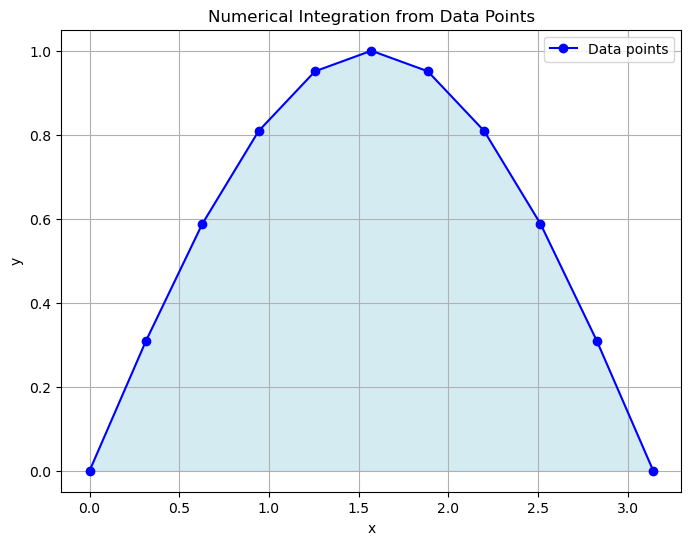

In [3]:
# 사다리꼴 방법과 심슨 방법을 포함한 수치적분 클래스 (데이터 포인트 기반)
class NumericalIntegrationFromPoints:
    def __init__(self, x_values, y_values):
        """
        NumericalIntegrationFromPoints 클래스 초기화
        :param x_values: x 데이터 포인트
        :param y_values: y 데이터 포인트 (f(x) 값들)
        """
        self.x_values = np.array(x_values)
        self.y_values = np.array(y_values)
        self.n = len(x_values) - 1  # 구간의 개수

    def trapezoidal_rule(self):
        """
        사다리꼴 방법으로 적분 수행 (데이터 포인트 기반)
        """
        h = np.diff(self.x_values)  # 각 구간의 너비
        integral = np.sum(h * (self.y_values[:-1] + self.y_values[1:]) / 2)
        return integral

    def simpsons_rule(self):
        """
        심슨 방법으로 적분 수행 (n은 짝수여야 함, 데이터 포인트 기반)
        """
        if self.n % 2 == 1:
            raise ValueError("데이터 포인트의 개수가 홀수여야 심슨 방법을 사용할 수 있습니다.")
        
        h = np.diff(self.x_values)[0]  # 모든 구간의 너비가 동일하다고 가정
        integral = h / 3 * (self.y_values[0] + 4 * np.sum(self.y_values[1:self.n:2]) + 
                            2 * np.sum(self.y_values[2:self.n-1:2]) + self.y_values[self.n])
        return integral

    def display_results(self):
        """
        사다리꼴 방법과 심슨 방법의 결과 출력
        """
        trapezoidal_result = self.trapezoidal_rule()
        simpsons_result = self.simpsons_rule()
        print(f"사다리꼴 방법으로 계산한 적분값: {trapezoidal_result}")
        print(f"심슨 방법으로 계산한 적분값: {simpsons_result}")

    def plot_integration(self):
        """
        함수와 적분 구간을 시각화 (데이터 포인트 기반)
        """
        plt.figure(figsize=(8, 6))
        plt.plot(self.x_values, self.y_values, 'o-', label='Data points', color='blue')
        plt.fill_between(self.x_values, self.y_values, color='lightblue', alpha=0.5)
        plt.title('Numerical Integration from Data Points')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()


# 예시 데이터 포인트
x_data = np.linspace(0, np.pi, 11)  # x 포인트 (0부터 pi까지 11개 점)
y_data = np.sin(x_data)  # y 포인트 (f(x) = sin(x))

# NumericalIntegrationFromPoints 클래스 인스턴스 생성
integration = NumericalIntegrationFromPoints(x_data, y_data)

# 결과 출력
integration.display_results()

# 함수 및 적분 구간 시각화
integration.plot_integration()


# Trapezoidal Method

$$
\int_{x_{j-1}}^{x_{j+1}} f(x)dx= \int_{x_{j-1}}^{x_{j}}f(x)dx + \int_{x_j}^{x_{j+1}}f(x)dx \\
= \frac{f(x_{j-1})+f(x_j)}{2}\Delta x + \frac{f(x_{j})+f(x_{j+1})}{2}\Delta x \\
= \frac{\Delta x}{2} [f(x_{j-1}) + 2f(x_j) + f(x_{j-1})) ]
$$

구간의 처음과 끝은 그대로 더하고, 그 중간의 값들은 모두 더한 뒤 2배로 한 다음 값들 사이의 간격의 절반으로 나누면 적분값으로 근사된다.

$$
S= \frac{\Delta x}{2} \bigg[f(x_0) + f(x_n)+ 2\sum_{j=1}^{n-1}f(x_j) \bigg] + \sigma(\Delta x)^2
$$

구간이 많아지면 더 정확해진다.

# Simpson Method

심슨 방법의 오차: $\sigma(\Delta x)^4$  
컴퓨터 성능이 부족하던 시절엔 강력했지만 데이터 크기를 늘리면 결국 같은 해로 수렴하기 때문에 지금은 별로 상관없어졌다.

데이터 포인트의 개수는 $n+1$ 개$(0 \sim n)$, 패널의 개수는 $n+1-1=n$ 개. 심슨 방법에서는 패널이 짝수 개여야 한다.

2개의 패널이 하나로 묶인 페어를 $D_1, D_3, ..., D_j, ...,D_{n-1}$이라고 하고, 페어의 개수는 $n/2$이다.

적분 역도함수를 아래와 같이 정의하고 추정한다.

$$
I(x)=\int_a^x f(x) dx
$$

$$
I(x_j + \Delta x) = I(x_j) + \Delta x I'(x_j) + \frac{\Delta x^2}{2} I''(x_j) + \frac{\Delta x^3}{3!} I'''(x_j) + \cdots
$$

$I'(x) = f(x)$, $I''(x) = f'(x)$ 이므로:

$$
= I(x_j) + \Delta x f(x_j) + \frac{\Delta x^2}{2}f'(x_j) + \frac{\Delta x^3}{3!} f''(x_j) + \cdots
$$

후방차분도 실시:

$$
I(x_j - \Delta x) = I(x_j) - \Delta x f(x_j) + \frac{\Delta x^2}{2}f'(x_j) - \frac{\Delta x^3}{3!} f''(x_j) + \cdots
$$

위의 전방차분식에서 후방차분식을 빼면 $D_j$의 면적, 즉 $j$ 번째 페어(패널 2개)의 면적이 나온다.

실제로 빼보면 부호가 양인 항들($n$ 계 도함수에서 $n$이 홀수인 항들)은 모두 소멸하고 음인 항들만 2배로 늘어난다.
$$
I(x_j + \Delta x) - I(x_j - \Delta x)=2 \bigg[\Delta x f(x_j) + \frac{\Delta x^3}{3!}f''(x_j) + \frac{(\Delta x)^3}{5!}f^{iv}(x_j) + \sigma(\Delta x )^7 \bigg]
$$

$$
f''(x_j)=\frac{f(x_{j + 1})-2f(x_j)+f(x_{j-1})}{\Delta x^2} - \frac{\Delta x^2}{12} f^{iv}(x_j) + \sigma(\Delta x)^4
$$

$$
D_j = \frac{\Delta x}{3} \bigg[f(x_{j-1}) + 4f(x_j) + f(x_{j+1}) \bigg] - \frac{\Delta x^5}{90}f^{iv}(x_j) + \sigma(\Delta x)^7
$$

이제 이걸 다 더하는 식을 구하면 주어진 구간과 데이터 포인트에 따른 적분값을 구할 수 있다.

$$
D_1 = \frac{\Delta x }{3}\bigg[f(x_0) + 4f(x_1) + f(x_2) \bigg] + \sigma \\
D_2 = \frac{\Delta x }{3}\bigg[f(x_2) + 4f(x_3) + f(x_4) \bigg] + \sigma \\
\vdots \\
D_{n-1} = \frac{\Delta x }{3}\bigg[f(x_{n-2}) + 4f(x_{n-2}) + f(x_n) \bigg] + \sigma
$$

잘 보면 __홀수 항만 4배__ 이다. 페어들의 __사이값(짝수)들은 2배__ , __구간의 양 끝값은 1 배__ 이다

$$
\frac{\Delta x}{3}\left(f(x_0) + 4\sum_{j=1;j+=2}^{n-1}f(x_j) +2\sum_{j=2;j+=2}^{n-2}f(x_j)+f(x_n) \right) - \frac{\Delta x^5}{90}\sum_{j=1;j+=2}^{n-1}f^{iv}(x_j) +\sigma(\Delta x)^7
$$

$$
- \frac{\Delta x^5}{90}\sum_{j=1;j+=2}^{n-1}f^{iv}(x_j) = - \frac{\Delta x^5}{90} \cdot \frac{n}{2} \cdot f^{iv}(\bar{x})
$$

$$
\text{where } n = \frac{b-a}{\Delta x}
$$

$$
= - \frac{\Delta x^5}{90} \cdot \frac{1}{2} \frac{b-a}{\Delta x} \cdot f^{iv}(\bar{x})
$$
$$
= - \frac{(\Delta x)^4(b-a)}{180} \cdot f^{iv}(\bar{x}) \approx -\sigma(\Delta x)^4
$$
$$
\therefore\ \sigma = -\sigma(\Delta x)^4 + \sigma(\Delta x)^7 \approx \sigma(\Delta x)^4
$$

# 예제

### $\cos{x}$ 예제

In [4]:
for i in range(2, 11, 2):
    print(f'데이터가 {i} 개일 때 수치적분값:')
    NumericalIntegration(f=np.cos, a=-np.pi /2, b=np.pi/2, n=i).display_results()
    print()

데이터가 2 개일 때 수치적분값:
사다리꼴 방법으로 계산한 적분값: 1.5707963267948966
심슨 방법으로 계산한 적분값: 2.0943951023931953

데이터가 4 개일 때 수치적분값:
사다리꼴 방법으로 계산한 적분값: 1.8961188979370398
심슨 방법으로 계산한 적분값: 2.0045597549844207

데이터가 6 개일 때 수치적분값:
사다리꼴 방법으로 계산한 적분값: 1.9540972333137065
심슨 방법으로 계산한 적분값: 2.0008631896735367

데이터가 8 개일 때 수치적분값:
사다리꼴 방법으로 계산한 적분값: 1.974231601945551
심슨 방법으로 계산한 적분값: 2.0002691699483877

데이터가 10 개일 때 수치적분값:
사다리꼴 방법으로 계산한 적분값: 1.9835235375094546
심슨 방법으로 계산한 적분값: 2.0001095173150043



#### 사다리꼴 방법

C 코드 결과 ($n=2$)

```C
fx[-1.570796] = 0.000000 
fx[0.000000] = 1.000000 
fx[1.570796] = 0.000000 

integration_trapezoidal method = 1.570797 
```

C 코드 결과 ($n=4$)

```C
fx[-1.570796] = 0.000000 
fx[-0.785398] = 0.707107 
fx[0.000000] = 1.000000 
fx[0.785398] = 0.707107 
fx[1.570796] = 0.000000 

integration_trapezoidal method = 1.896119 
```

$n=100$

```C
integration_trapezoidal method = 1.999836 
```

#### 심슨 방법

$n=2$

```C
fx[-1.570796] = 0.000000 
fx[0.000000] = 1.000000 
fx[1.570796] = 0.000000 

integration using simpson method = 2.094395 
```

$n=4$
```C
fx[-1.570796] = 0.000000 
fx[-0.785398] = 0.707107 
fx[0.000000] = 1.000000 
fx[0.785398] = 0.707107 
fx[1.570796] = 0.000000 

integration using simpson method = 2.004560 
```

$n=100$
```C
integration using simpson method = 2.000000 
```

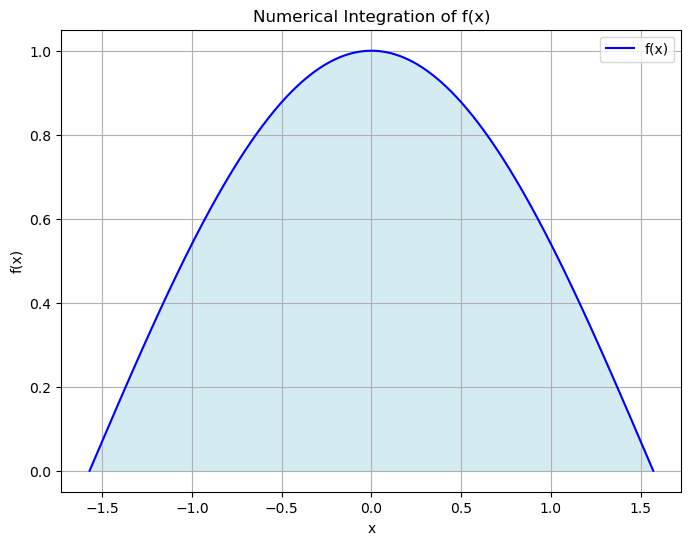

In [5]:
NumericalIntegration(f=np.cos, a=-np.pi/2, b=np.pi/2, n=100).plot_integration()

### Chapra 책 PROBLEM 19.16

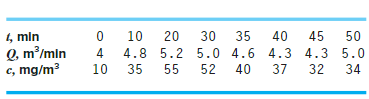

$$
M=\int_{t_1}^{t_2} Q \cdot c\ dt
$$

In [6]:
integ = NumericalIntegrationFromPoints(x_values=[0, 10, 20, 30, 35, 40, 45, 50],
                                        y_values=[4*10, 4.8*35, 5.2*55, 5*52, 4.6*40, 4.2*37, 4.3*32, 5*34])
integ.trapezoidal_rule()

9500.0

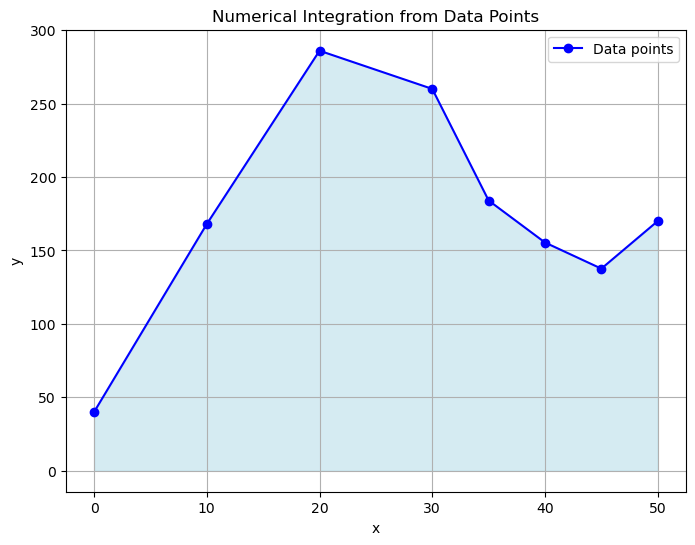

In [7]:
integ.plot_integration()

### Chapra 책 PROBLEM 19.2

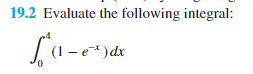

```C
fx[0.000000] = 0.000000 
fx[1.000000] = 0.632121 
fx[2.000000] = 0.864665 
fx[3.000000] = 0.950213 
fx[4.000000] = 0.981684 

integration_trapezoidal method = 2.937840 
 Error = 0.170476
```

```C
fx[0.000000] = 0.000000 
fx[1.000000] = 0.632121 
fx[2.000000] = 0.864665 
fx[3.000000] = 0.950213 
fx[4.000000] = 0.981684 

integration using simpson method = 3.013449 
 Error = 0.004867
```